In [6]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split # Dividir os dados em treino e teste
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder # Transforma dados categóricos em informações numéricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report 

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [24]:
base = pd.read_csv('insurance.csv')
base = base.drop(columns= ['Unnamed: 0'])
base = base.fillna('None')
base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [25]:
y = base.iloc[:,7].values
x = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

In [26]:
labelencoder = LabelEncoder()

In [27]:
for i in range(x.shape[1]):
  if x[:,i].dtype == 'object':
    x[:,i] = labelencoder.fit_transform(x[:,i])

In [29]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size=0.3, random_state=1)

In [30]:
modelo = RandomForestClassifier(random_state=1, n_estimators=500)
modelo.fit(x_treinamento, y_treinamento)

RandomForestClassifier(n_estimators=500, random_state=1)

In [31]:
previsoes = modelo.predict(x_teste)
previsoes

array(['None', 'None', 'None', ..., 'None', 'Mild', 'None'],
      shape=(6000,), dtype=object)

In [32]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average=None)
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(accuracy)
print(precision)
print(recall)
print(f1)

0.9431666666666667
[0.8929385  0.78361345 0.97595932 0.88537549]
0.9431666666666667
0.9412363989596191


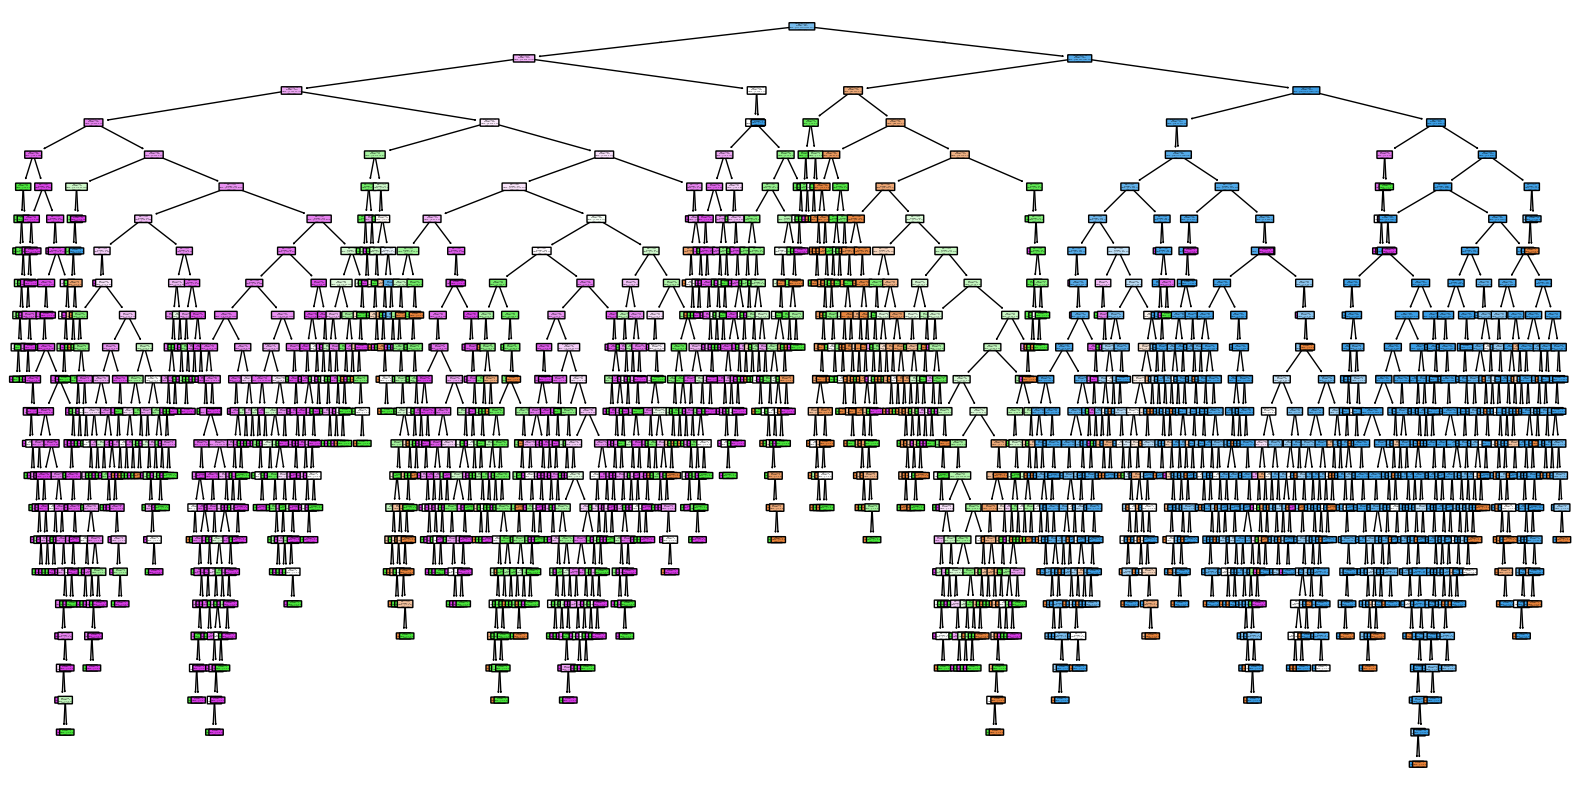

In [38]:
tree_index = 0
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)
plt.show()

In [22]:
dot_data = export_graphviz(modelo, out_file=None, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.499444 to fit


'decision_tree.png'